In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient - PyTorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

In [2]:
nb_states = 1
nb_actions = 10

In [3]:
_theta_t = torch.zeros((nb_states, nb_actions), requires_grad=True)

In [4]:
def pi_t(state):
    """Return policy, i.e. probability distribution over actions."""
    with torch.no_grad():
        prob_t = torch.softmax(_theta_t[state], dim=-1)
        return prob_t.numpy()

In [5]:
def grad_t(state, action):
    prob_t = torch.softmax(_theta_t[state], dim=-1)
    log_t = torch.log(prob_t)
    loss = log_t[action]  # -1 grad ascent, scale by R
    loss.backward()
    
    grad = _theta_t.grad.data.numpy().copy()
    _theta_t.grad.data.zero_()
    return grad

In [6]:
pi_t(0)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], dtype=float32)

In [7]:
grad_t(0, 0)

array([[ 0.90000004, -0.1       , -0.1       , -0.1       , -0.1       ,
        -0.1       , -0.1       , -0.1       , -0.1       , -0.1       ]],
      dtype=float32)

# Gaussian - PyTorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

In [2]:
def gaussian_t(x_t, mean_t, std_t):
    var_t = std_t**2
    denom_t = (2*np.pi*var_t)**.5
    num_t = torch.exp( -(x_t-mean_t)**2 / (2*var_t) )
    return num_t / denom_t

In [3]:
nb_states = 1
nb_actions = 10
lr = 0.1

In [4]:
_theta_mu_t = torch.zeros(nb_states, requires_grad=True)
_theta_sigma_t = torch.ones(nb_states, requires_grad=True)

In [5]:
# _dist = torch.distributions.Normal(_theta_mu_t, _theta_sigma_t)

In [6]:
def pi_t(state, mu_t, sigma_t, do_exp):
    with torch.no_grad():
        std_t = torch.exp(sigma_t) if do_exp else sigma_t
        #return np.random.normal(loc=theta_mu, scale=theta_sigma)
        return torch.normal(mu_t, std_t).item()

In [7]:
def print_plot(mu_t, sigma_t, do_exp):
    
    with torch.no_grad():
        
        
        
        print('mu_t:', mu_t, mu_t.grad)
        print('sigma_t:', sigma_t, sigma_t.grad)
        
        std_t = torch.exp(sigma_t) if do_exp else sigma_t
            
        print('std_t:', std_t, std_t.grad)
        
        res = []
        for i in range(100000):
            res.append(pi_t(0, mu_t, sigma_t, do_exp))
        plt.hist(res, bins=100, density=True)
        
        X_t = torch.linspace(-10, 10)
        Y_t = gaussian_t(X_t, mean_t=0.0, std_t=1.0)
        plt.plot(X_t.numpy(), Y_t.numpy())
        Y_t = gaussian_t(X_t, mean_t=mu_t, std_t=std_t)
        plt.plot(X_t.numpy(), Y_t.numpy(), color='red')
        
    plt.show()

mu_t: tensor([0.], requires_grad=True) None
sigma_t: tensor([1.], requires_grad=True) None
std_t: tensor([1.], requires_grad=True) None


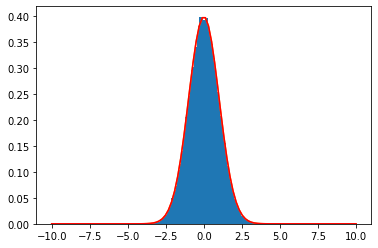

In [8]:
print_plot(_theta_mu_t, _theta_sigma_t, do_exp=False)

In [450]:
do_exp = True

In [451]:
_theta_mu_t = torch.zeros(nb_states, requires_grad=True)
if not do_exp:
    _theta_sigma_t = torch.ones(nb_states, requires_grad=True)
else:
    _theta_sigma_t = torch.zeros(nb_states, requires_grad=True)
_theta_sigma_t

tensor([0.], requires_grad=True)

In [452]:
lr = 0.01

In [453]:
std_t = torch.exp(_theta_sigma_t) if do_exp else _theta_sigma_t
std_t

tensor([1.], grad_fn=<ExpBackward>)

In [454]:
prob_t = gaussian_t(5.0, _theta_mu_t, std_t)
print(prob_t)
print(prob_t.grad)

tensor([1.4867e-06], grad_fn=<DivBackward0>)
None


In [455]:
log_t = torch.log(prob_t)
print(log_t)
print(log_t.grad)

tensor([-13.4189], grad_fn=<LogBackward>)
None


In [456]:
loss = log_t
loss.backward()

In [457]:
print(log_t)
print(log_t.grad)

tensor([-13.4189], grad_fn=<LogBackward>)
None


In [458]:
print(_theta_mu_t)
print(_theta_mu_t.grad)

tensor([0.], requires_grad=True)
tensor([5.])


In [459]:
print(_theta_sigma_t)
print(_theta_sigma_t.grad)

tensor([0.], requires_grad=True)
tensor([24.])


In [460]:
_theta_mu_t.data.add_(lr * _theta_mu_t.grad.data)
_theta_sigma_t.data.add_(lr * _theta_sigma_t.grad.data)
_theta_mu_t.grad.data.zero_()
_theta_sigma_t.grad.data.zero_()

tensor([0.])

mu_t: tensor([0.0500], requires_grad=True) tensor([0.])
sigma_t: tensor([0.2400], requires_grad=True) tensor([0.])
std_t: tensor([1.2712]) None


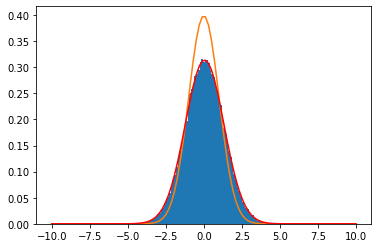

In [461]:
print_plot(_theta_mu_t, _theta_sigma_t, do_exp)

mu_t: tensor([0.0500], requires_grad=True) tensor([0.])
sigma_t: tensor([1.2400], requires_grad=True) tensor([0.])
std_t: tensor([1.2400], requires_grad=True) tensor([0.])


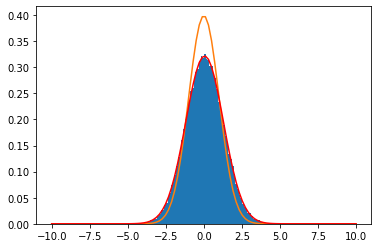

In [30]:
print_plot(_theta_mu_t, _theta_sigma_t, do_exp)

# Grad - numpy

In [515]:
import numpy as np
import matplotlib.pyplot as plt

In [516]:
theta_mu = 0.0
theta_sigma = 0.0

In [517]:
def gaussian(x, mean, std):
    var = std**2
    denom = (2*np.pi*var)**.5
    num = np.exp( -(x-mean)**2 / (2*var) )
    return num / denom

In [518]:
def pi(theta_mu, theta_sigma):
    return np.random.normal(loc=theta_mu, scale=np.exp(theta_sigma))

In [519]:
def x_mu(state):
    return 1.0

In [520]:
def x_sigma(state):
    return 1.0

In [521]:
def grad_ln_theta_mu(state, action, theta_mu, theta_sigma):
    mu, sigma = theta_mu, np.exp(theta_sigma)
    return (1 / sigma) * (action - mu) * x_mu(state)  # Ex. 13.4

In [522]:
def grad_ln_theta_sigma(state, action, theta_mu, theta_sigma):
    mu, sigma = theta_mu, np.exp(theta_sigma)
    return (((action - mu)**2 / sigma**2) - 1) * x_sigma(state)

In [523]:
grad_ln_theta_mu(None, 5.0, theta_mu, theta_sigma)

5.0

In [524]:
grad_ln_theta_sigma(None, 5.0, theta_mu, theta_sigma)

24.0

In [525]:
aa = np.linspace(-3, 3)
mm = grad_ln_theta_mu(None, aa, theta_mu, theta_sigma)
ss = grad_ln_theta_sigma(None, aa, theta_mu, theta_sigma)

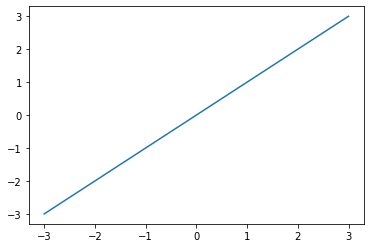

In [526]:
plt.plot(aa, mm)

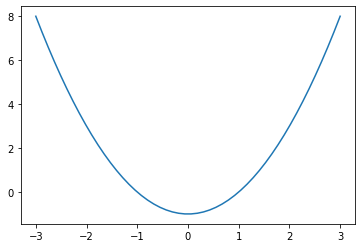

In [527]:
plt.plot(aa, ss)

In [532]:
def print_plot(theta_mu, theta_sigma):
    mu, sigma = theta_mu, np.exp(theta_sigma)
    
    print('mu:', mu)
    print('sigma:', sigma)
        
    res = []
    for i in range(100000):
        res.append(pi(theta_mu, theta_sigma))
    plt.hist(res, bins=100, density=True)

    X = np.linspace(-10, 10)
    Y = gaussian(X, mean=0.0, std=1.0)
    plt.plot(X, Y)
    Y = gaussian(X, mean=mu, std=sigma)
    plt.plot(X, Y, color='red')

    plt.show()

mu: 0.0
sigma: 1.0


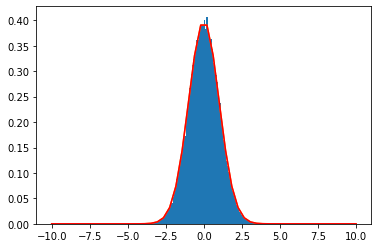

In [533]:
print_plot(theta_mu, theta_sigma)

In [545]:
lr = 0.01

In [546]:
theta_mu = 0.0
theta_sigma = 0.0

In [577]:
lr = 0.01

In [578]:
grad_theta_mu = grad_ln_theta_mu(None, 5.0, theta_mu, theta_sigma)
grad_theta_sigma = grad_ln_theta_sigma(None, 5.0, theta_mu, theta_sigma)

In [579]:
print(theta_mu, grad_theta_mu)
print(theta_sigma, grad_theta_sigma)

0.20575573667853056 2.4137238738702425
0.6862453557696178 4.8260629392911705


In [580]:
theta_mu += lr * grad_theta_mu
theta_sigma += lr * grad_theta_sigma

mu: 0.22989297541723297
sigma: 2.08445198789718


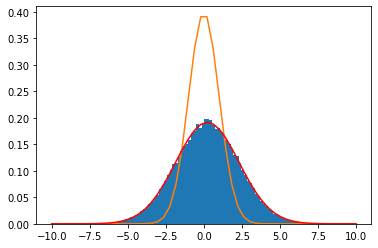

In [581]:
print_plot(theta_mu, theta_sigma)

In [586]:
lr = 0.01
theta_mu = 0.0
theta_sigma = 0.0

In [587]:
res_theta_mu = []
res_theta_sigma = []
res_sigma = []

In [588]:
for i in range(1000):
    grad_theta_mu = grad_ln_theta_mu(None, 5.0, theta_mu, theta_sigma)
    grad_theta_sigma = grad_ln_theta_sigma(None, 5.0, theta_mu, theta_sigma)
    
    theta_mu += lr * grad_theta_mu
    theta_sigma += lr * grad_theta_sigma
    
    res_theta_mu.append(theta_mu)
    res_theta_sigma.append(theta_sigma)
    res_sigma.append(np.exp(theta_sigma))

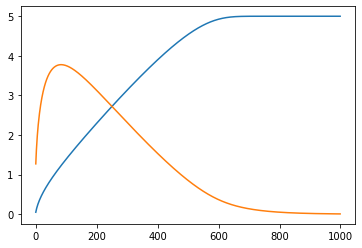

In [589]:
plt.plot(res_theta_mu)
plt.plot(res_sigma)